In [1]:
# NFL point differential visualization

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
# read data
df = pd.read_csv("nfl_points.csv")
df[["PD", "PtTot", "Count"]]

,PD,PtTot,Count
0,0,86,1
1,0,38,1
2,0,58,1
3,0,52,1
4,0,76,1
...,...,...,...
1085,60,60,2
1086,62,62,1
1087,64,64,1
1088,66,66,1


In [3]:
df['WeightedPtTot'] = df['PtTot'] * df['Count']

grouped = df.groupby('PD').agg(
    TotalWeightedPtTot=('WeightedPtTot', 'sum'),
    TotalCount=('Count', 'sum')
).reset_index()

grouped['AveragePtTot'] = grouped['TotalWeightedPtTot'] / grouped['TotalCount']
grouped['Count'] = grouped['TotalCount']


print(grouped[['PD', 'AveragePtTot', 'Count']])

    PD  AveragePtTot  Count
0    0     25.423197    319
1    1     40.121547    724
2    2     41.639344    610
3    3     40.582312   2284
4    4     38.843652    953
..  ..           ...    ...
60  60     60.000000      2
61  62     62.000000      1
62  64     64.000000      1
63  66     66.000000      1
64  73     73.000000      1

[65 rows x 3 columns]


In [4]:
# number of nfl games
sum(grouped['Count'])

17937

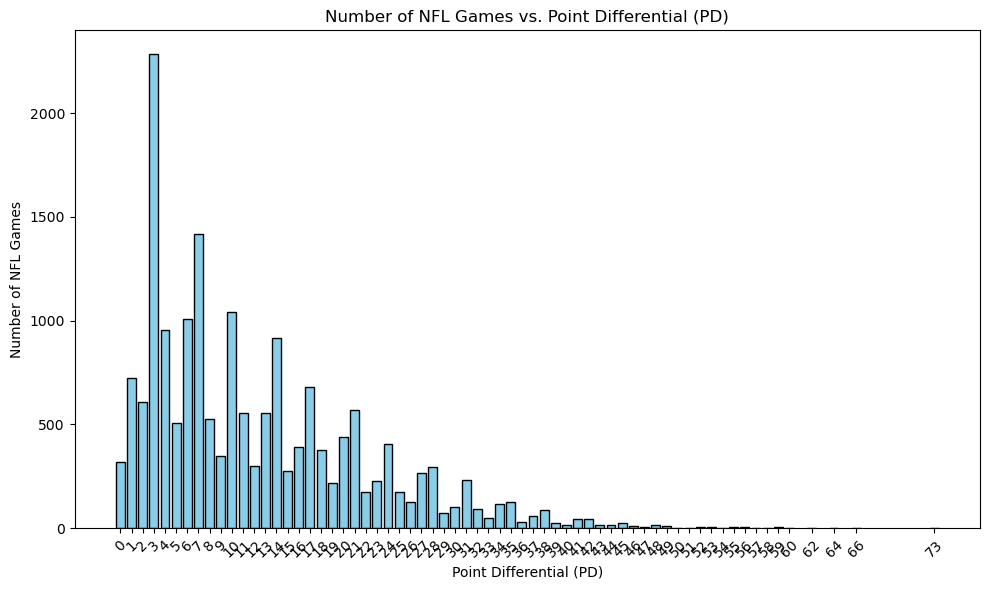

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(grouped['PD'], grouped['Count'], color='skyblue', edgecolor='black')
plt.xlabel('Point Differential (PD)')
plt.ylabel('Number of NFL Games')
plt.title('Number of NFL Games vs. Point Differential (PD)')
plt.xticks(grouped['PD'], rotation=45)
plt.tight_layout()
plt.show()

# Observations
- 2,284 NFL games out of 17,937 total NFL games have ended in a 3 point differential, the most common result. (12.7%)

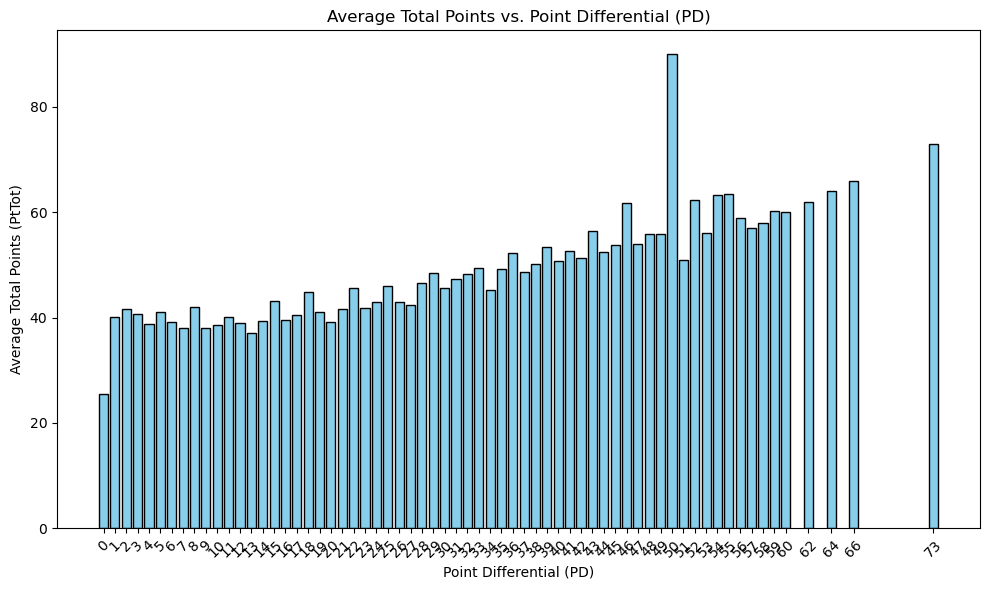

In [6]:
# Average Point Total vs. Point Differential

plt.figure(figsize=(10, 6))
plt.bar(grouped['PD'], grouped['AveragePtTot'], color='skyblue', edgecolor='black')
plt.xlabel('Point Differential (PD)')
plt.ylabel('Average Total Points (PtTot)')
plt.title('Average Total Points vs. Point Differential (PD)')
plt.xticks(grouped['PD'], rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Investigate PD = 50
display(df.loc[df['PD'] == 50]) 

,Rk,Score,PtsW,PtsL,PtTot,PD,Count,Temp,Last Game,WeightedPtTot
1067,1068,70-20,70,20,90,50,1,all games,Miami Dolphins vs. Denver Broncos September 24...,90


# Observations
- For PD of 50, it was when the Dolphins beat the Broncos 70-20 on September 24, 2023, scoring the most points by an NFL team in a game since 1966.

In [8]:
# AveragePtTot vs. Point Differential Analysis
X = grouped['PD']
Y = grouped['AveragePtTot']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePtTot   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     202.3
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           2.44e-21
Time:                        13:11:05   Log-Likelihood:                -197.50
No. Observations:                  65   AIC:                             399.0
Df Residuals:                      63   BIC:                             403.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.0911      1.244     27.398      0.0

# Observations
- Looking at R-squared value, the model explains 76.3% of the variance in AveragePtTot based on the predictor PD.
- Both the intercept and the slope are statistically significant.